In [1]:
pip install sdv

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install table_evaluator

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from sdmetrics.reports.single_table import QualityReport
from ctgan import CTGAN
from rdt import HyperTransformer

In [4]:
real_data = pd.read_csv("/kaggle/input/forestcoverdataset/covtype.csv")

In [5]:
df = pd.DataFrame(real_data)

print(df.columns)

print("Original DataFrame:")
print(df)

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [6]:
NUM_ROWS = 100000
NUM_EPOCHS = 1000
BATCH_SIZE = 8000

In [7]:
ht = HyperTransformer()
ht.detect_initial_config(data = df)
detected_config = ht.get_config()
display(detected_config)

{
    "sdtypes": {
        "Elevation": "numerical",
        "Aspect": "numerical",
        "Slope": "numerical",
        "Horizontal_Distance_To_Hydrology": "numerical",
        "Vertical_Distance_To_Hydrology": "numerical",
        "Horizontal_Distance_To_Roadways": "numerical",
        "Hillshade_9am": "numerical",
        "Hillshade_Noon": "numerical",
        "Hillshade_3pm": "numerical",
        "Horizontal_Distance_To_Fire_Points": "numerical",
        "Wilderness_Area1": "numerical",
        "Wilderness_Area2": "numerical",
        "Wilderness_Area3": "numerical",
        "Wilderness_Area4": "numerical",
        "Soil_Type1": "numerical",
        "Soil_Type2": "numerical",
        "Soil_Type3": "numerical",
        "Soil_Type4": "numerical",
        "Soil_Type5": "numerical",
        "Soil_Type6": "numerical",
        "Soil_Type7": "numerical",
        "Soil_Type8": "numerical",
        "Soil_Type9": "numerical",
        "Soil_Type10": "numerical",
        "Soil_Type11": "numer

In [8]:
ht.fit(df)
transformed_df = ht.transform(df)
transformed_df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
581008,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
581009,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
581010,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [9]:
import time

start_time = time.time()  # Capture start time before training

model = CTGAN(
    epochs=NUM_EPOCHS,
    verbose=True,
    batch_size=BATCH_SIZE,
    embedding_dim = 1024,
    discriminator_steps = 6,
    discriminator_dim = (512,512),
    cuda = True
)

model.fit(transformed_df)

# Training is finished, record end time
end_time = time.time()

# Calculate total training time in seconds
training_time = end_time - start_time

print(f"Training completed! Total time taken: {training_time:.2f} seconds")

Gen. (-1.75) | Discrim. (-0.07): 100%|██████████| 1000/1000 [8:04:28<00:00, 29.07s/it] 

Training completed! Total time taken: 30142.61 seconds


In [10]:
model.save("/kaggle/working/model2.pkl")

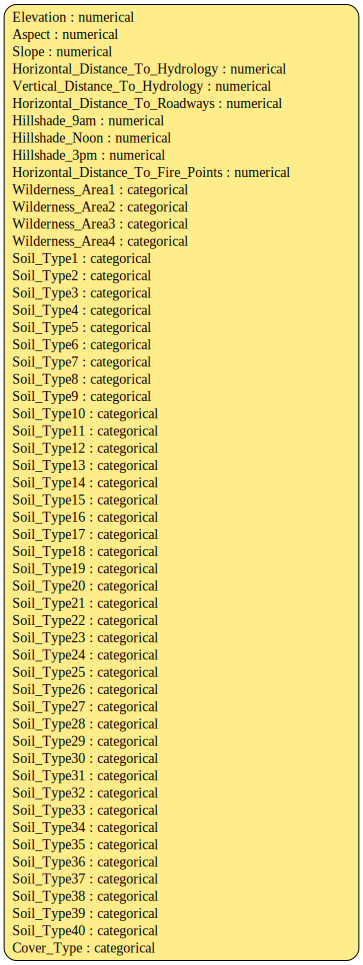

In [11]:
from sdv.metadata import SingleTableMetadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(df)
metadata_dict= metadata.to_dict()
metadata.visualize()

In [12]:
from sdmetrics.reports.single_table import QualityReport

# Get Synthetic data
synthetic_data = model.sample(NUM_ROWS)
# reverse transform the data
synthetic_data = ht.reverse_transform(synthetic_data)

report = QualityReport()
# Use the metadata OBJECT instead of the dictionary
report.generate(df, synthetic_data, metadata.to_dict())

cs_report = report.get_details(property_name="Column Shapes")
print(cs_report)

# Create the first figure
fig1 = report.get_visualization(property_name='Column Shapes')
fig1.show()

# Create the second figure
fig2 = report.get_visualization(property_name='Column Pair Trends')

fig2.show()

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 55/55 [00:06<00:00,  8.51it/s]|
Column Shapes Score: 99.58%

(2/2) Evaluating Column Pair Trends: |██████████| 1485/1485 [23:18<00:00,  1.06it/s]|
Column Pair Trends Score: 93.77%

Overall Score (Average): 96.68%

                                Column        Metric     Score
0                            Elevation  KSComplement  0.982430
1                               Aspect  KSComplement  0.990290
2                                Slope  KSComplement  0.991250
3     Horizontal_Distance_To_Hydrology  KSComplement  0.952475
4       Vertical_Distance_To_Hydrology  KSComplement  0.973129
5      Horizontal_Distance_To_Roadways  KSComplement  0.987171
6                        Hillshade_9am  KSComplement  0.980189
7                       Hillshade_Noon  KSComplement  0.982878
8                        Hillshade_3pm  KSComplement  0.992669
9   Horizontal_Distance_To_Fire_Points  KSComplement  0.990984
10                    Wil

In [16]:
report.save("/kaggle/working/report_forest_1000epochs_8000BS_1024_6_512.pkl")

In [20]:
synthetic_data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,3315,322,8,22,20,3384,192,242,196,562,...,0,0,0,0,0,0,0,0,0,1
1,2508,103,10,100,-1,1061,231,230,123,2385,...,0,0,0,0,0,0,0,0,0,1
2,2699,164,19,-5,0,984,215,241,156,1054,...,0,0,0,0,0,0,0,0,0,5
3,2713,210,19,435,54,1319,208,252,181,997,...,0,0,0,0,0,0,0,0,0,2
4,3539,155,26,281,121,5093,244,249,108,755,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2366,133,5,28,26,1832,237,251,128,1063,...,0,0,0,0,0,0,0,0,0,3
99996,2986,57,11,221,-4,2630,216,226,148,2521,...,0,0,0,0,0,0,0,0,0,2
99997,3200,321,16,148,56,1885,164,212,165,2247,...,0,0,0,0,0,0,0,0,0,1
99998,2841,177,16,43,12,373,203,242,185,1225,...,0,0,0,0,0,0,0,0,0,5


In [13]:
from sdmetrics.visualization import get_column_plot

# Loop through each column in the dataframe
for column in df.columns:
    fig = get_column_plot(
        real_data=df,
        synthetic_data=synthetic_data,
        column_name=column,
    )

    fig.show()

LinAlgError: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.

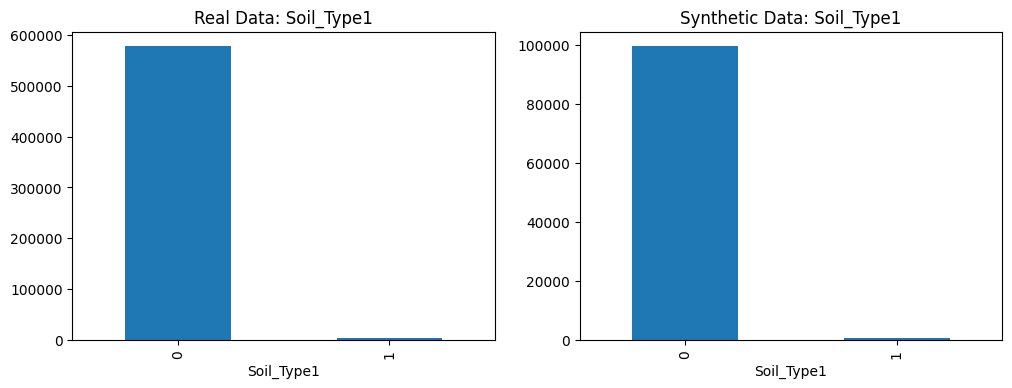

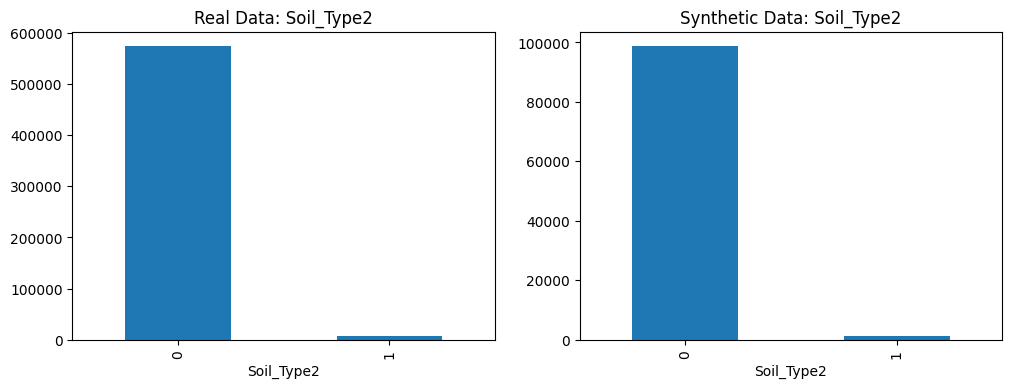

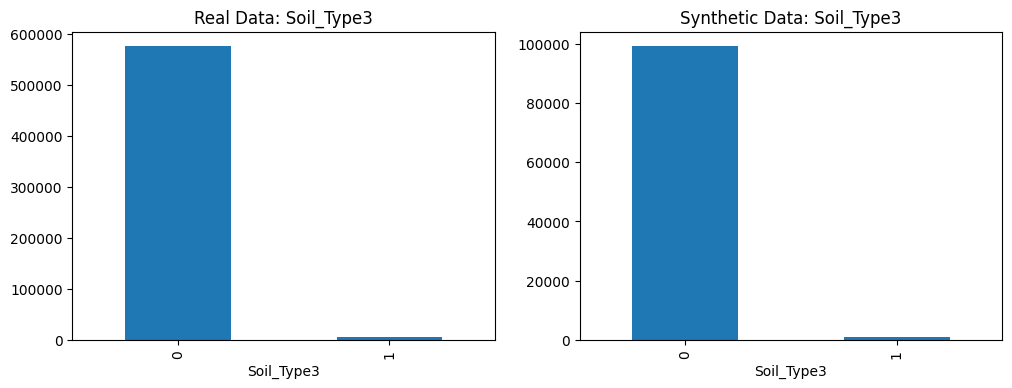

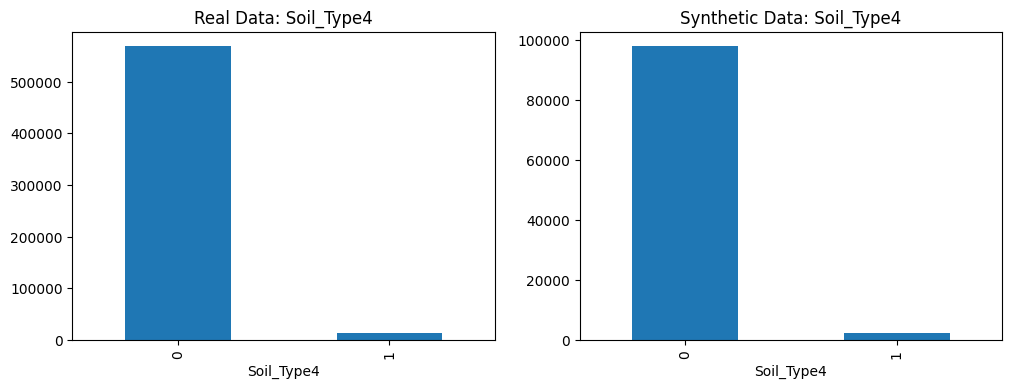

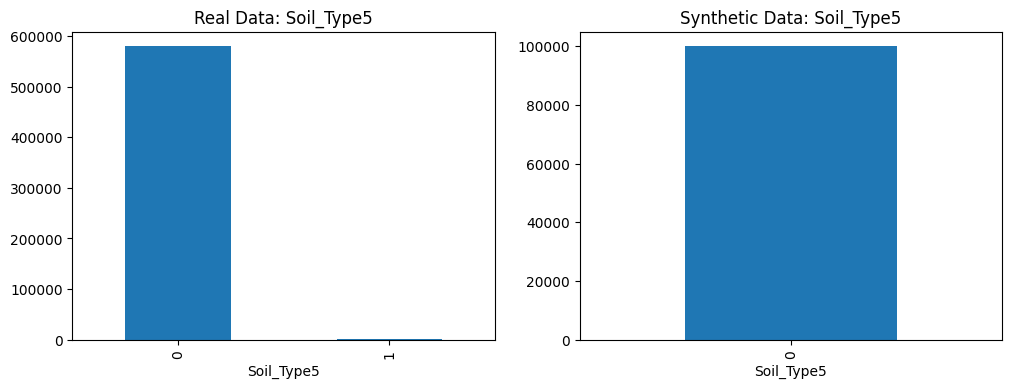

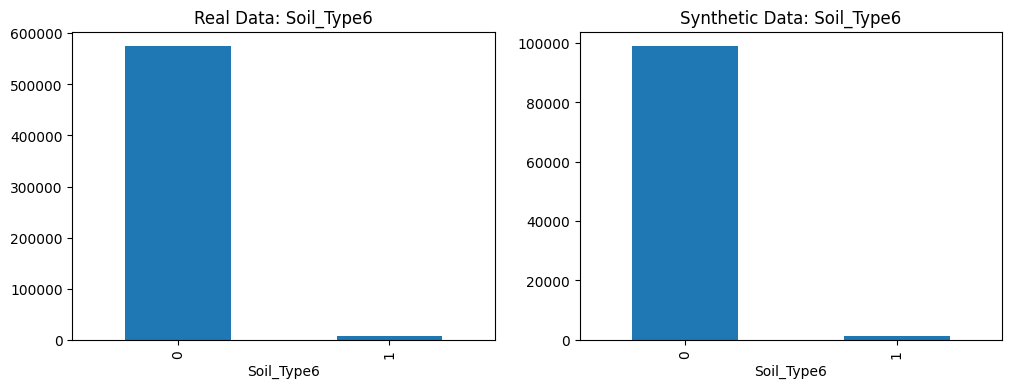

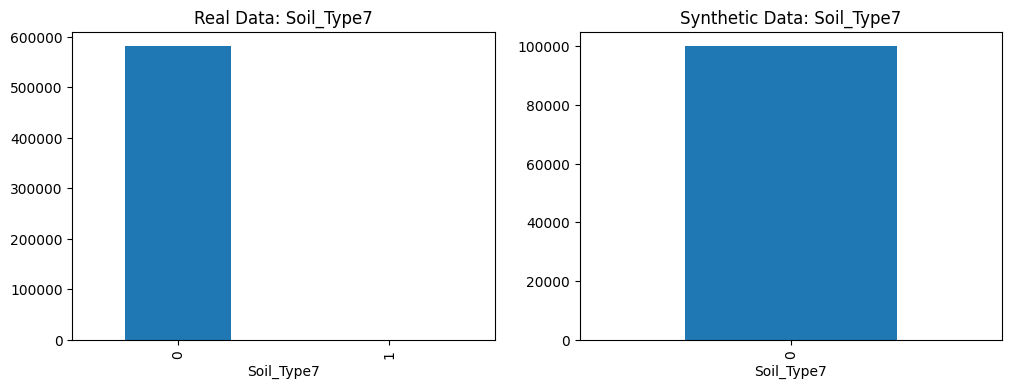

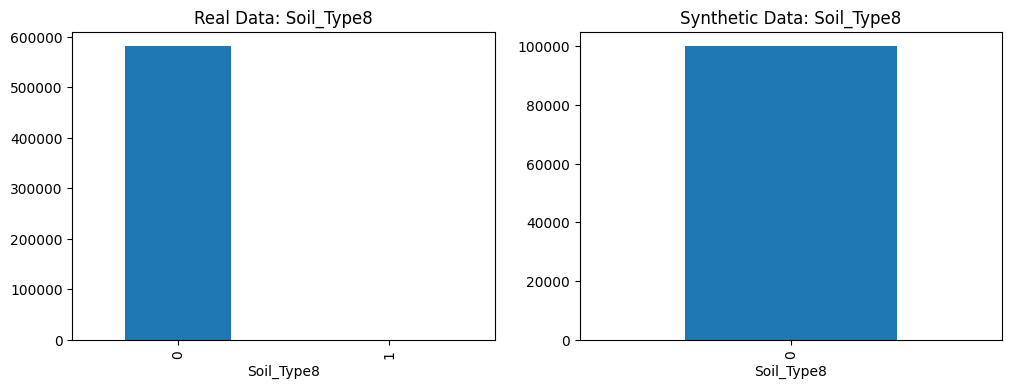

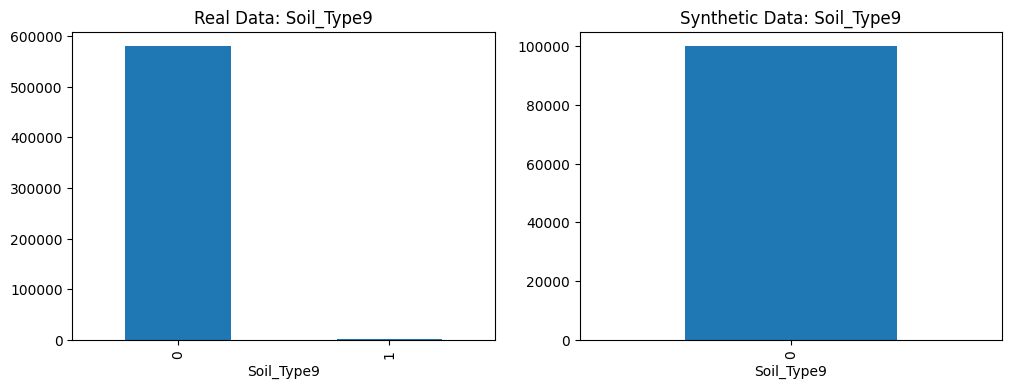

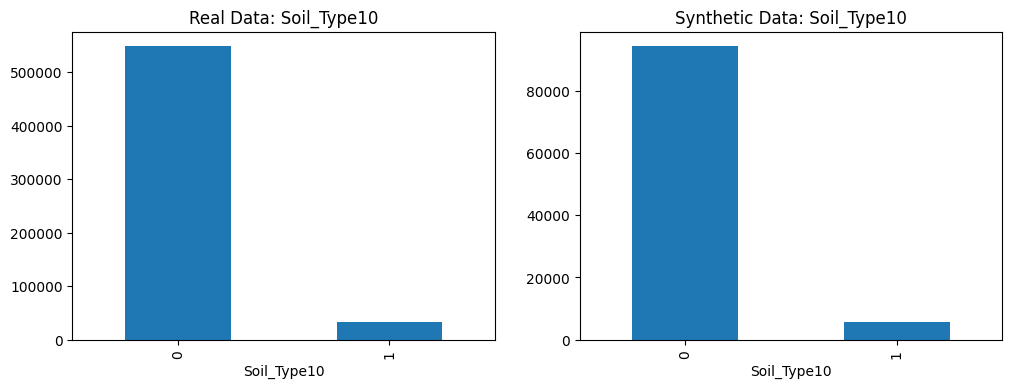

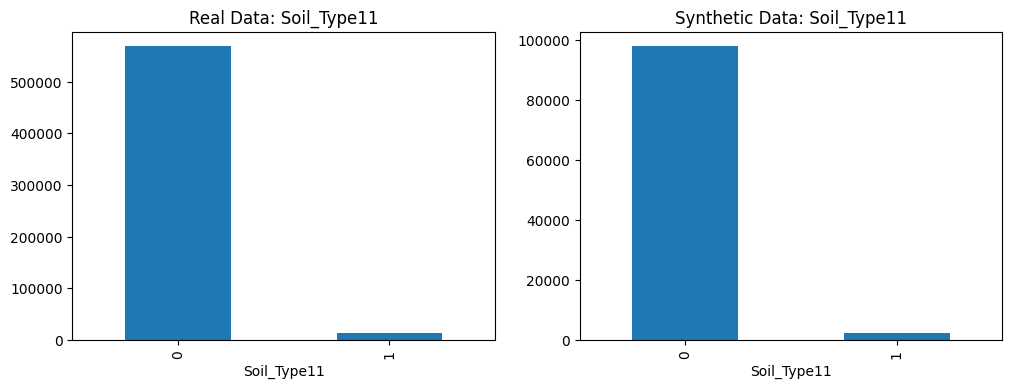

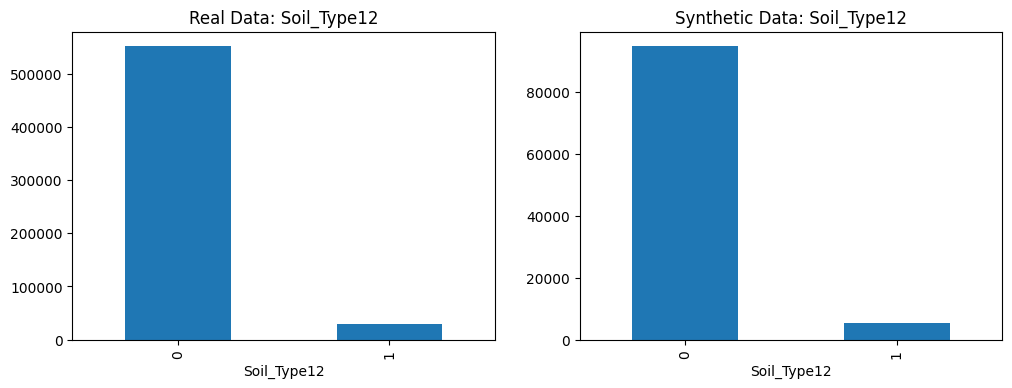

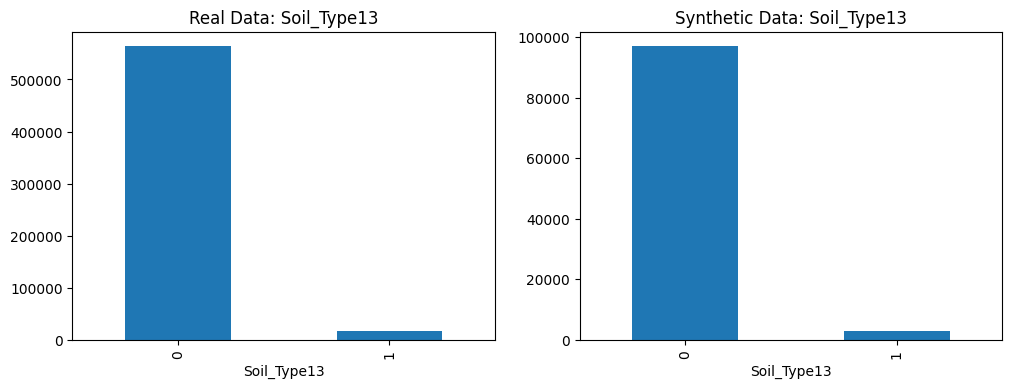

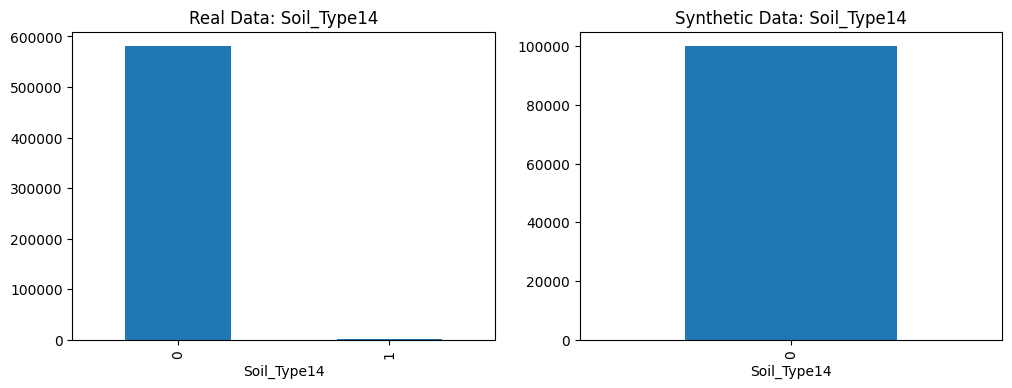

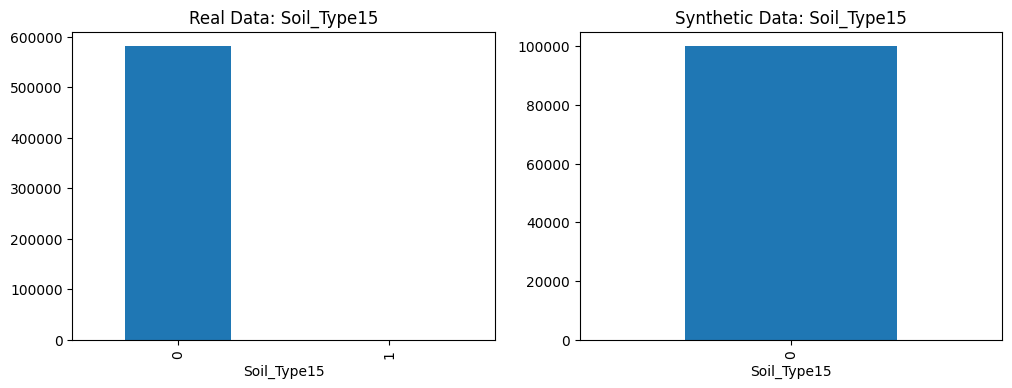

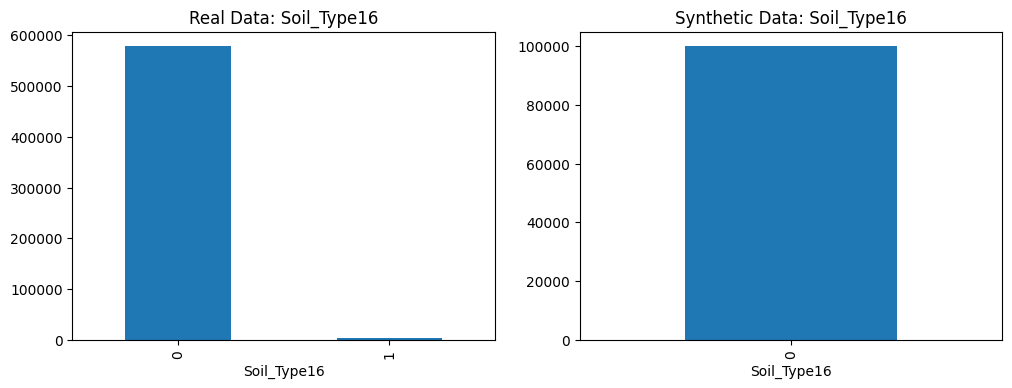

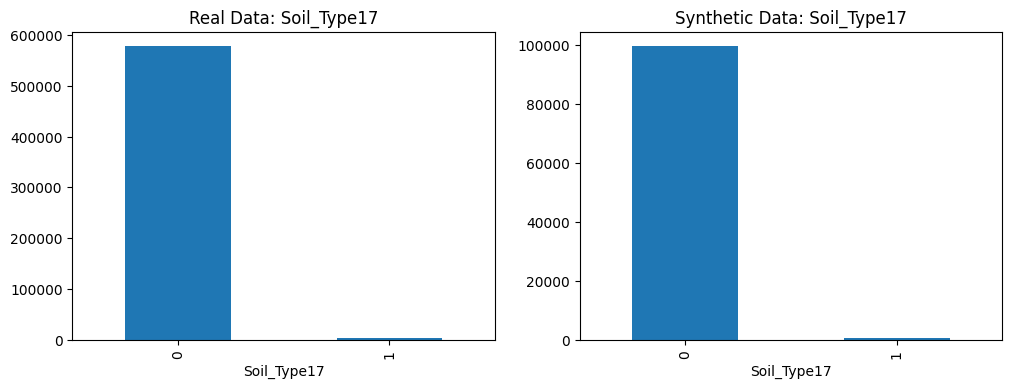

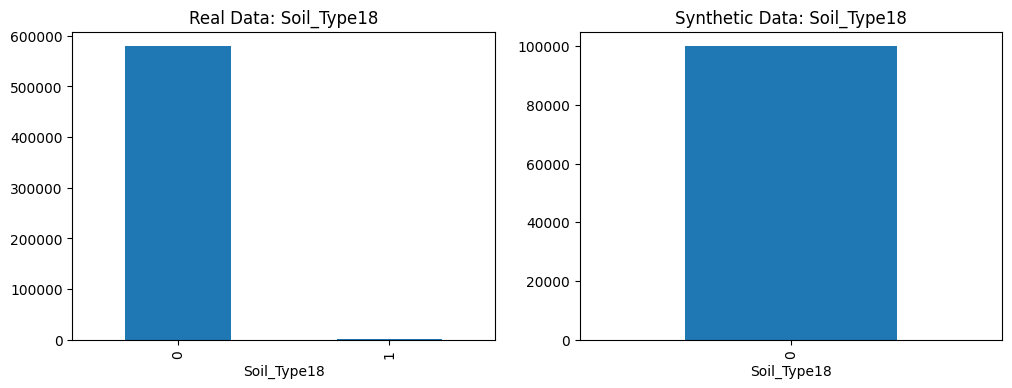

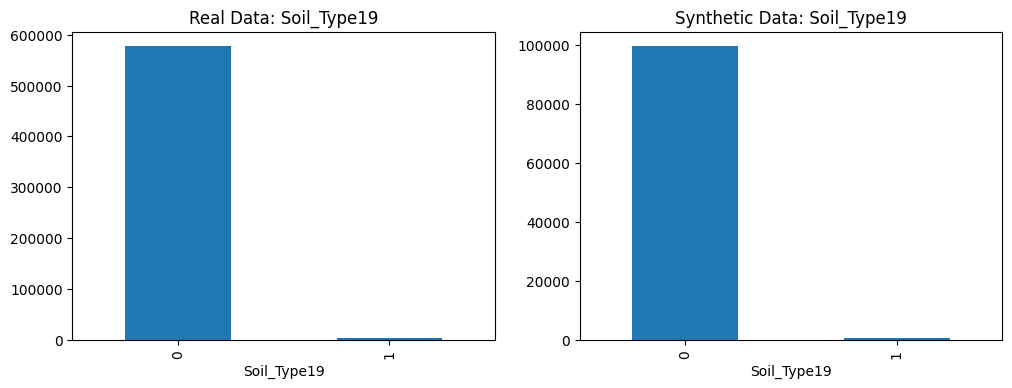

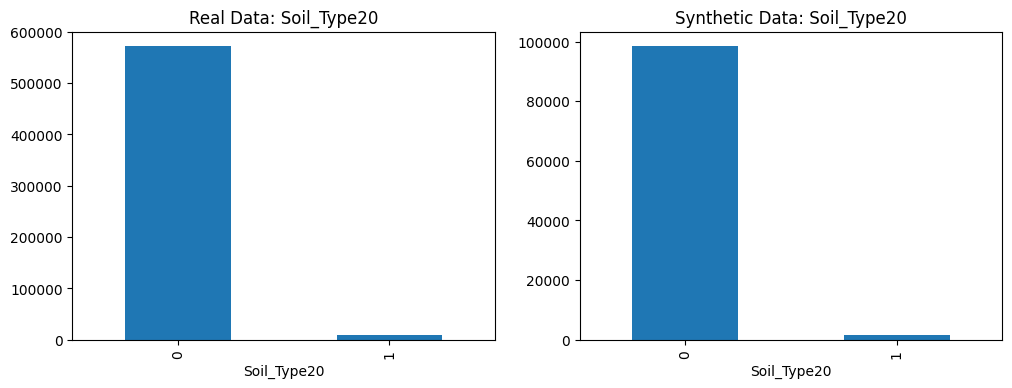

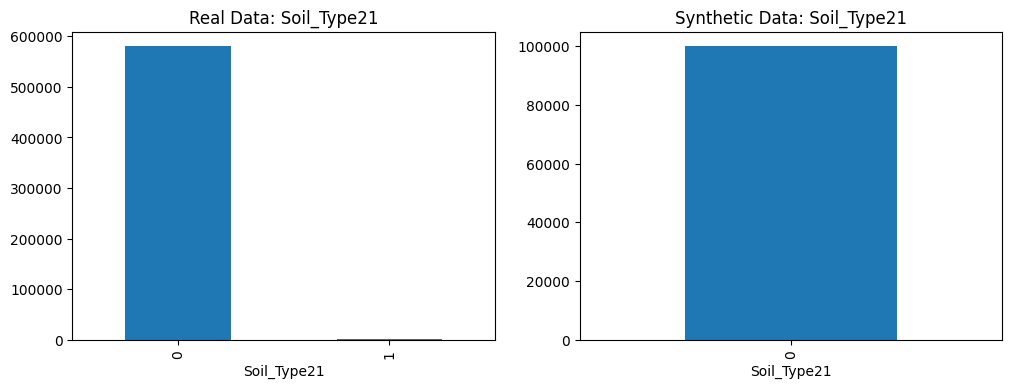

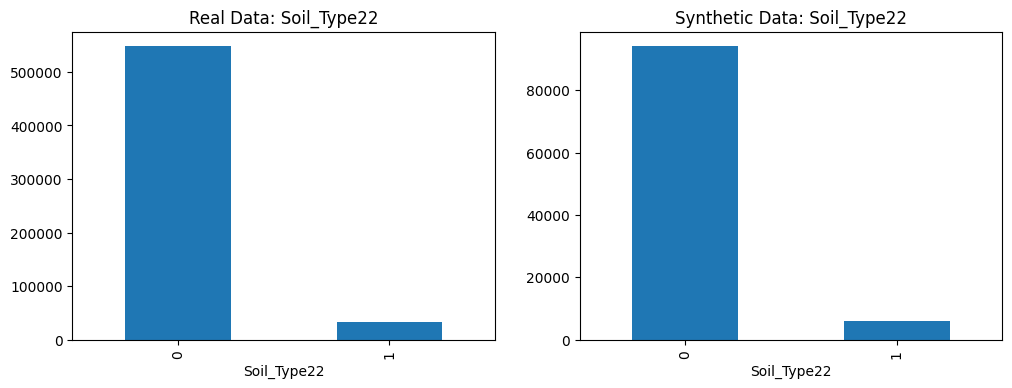

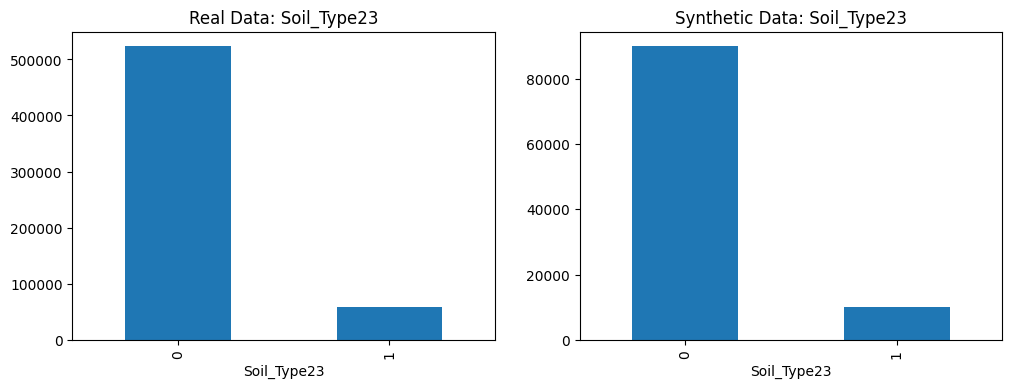

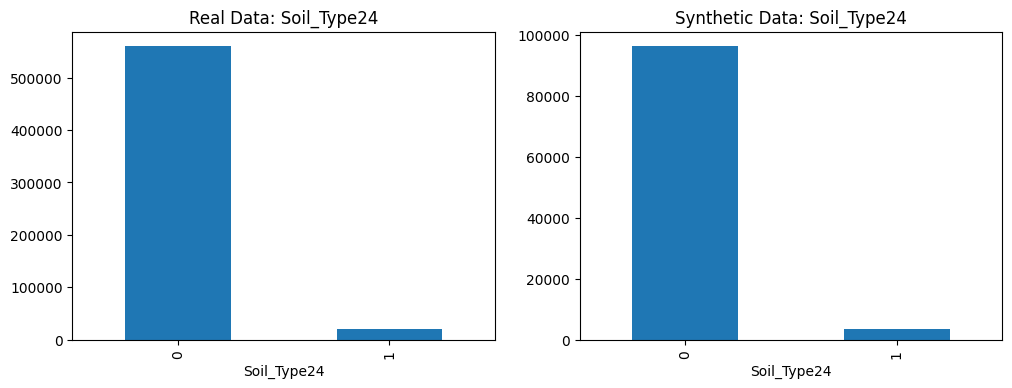

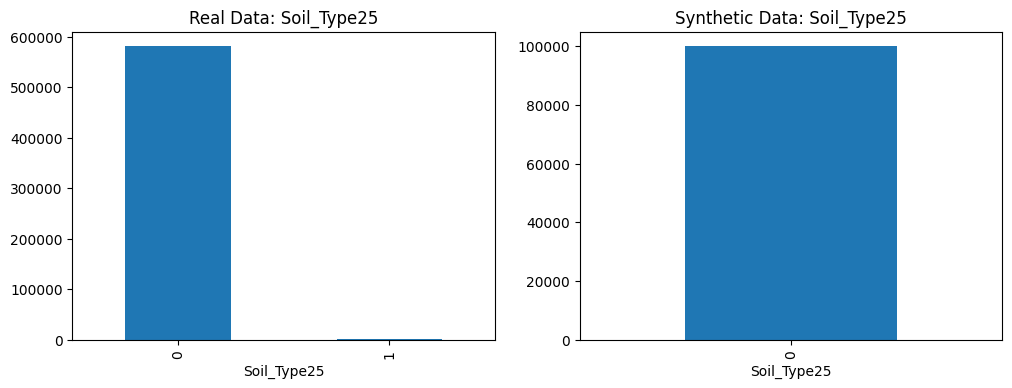

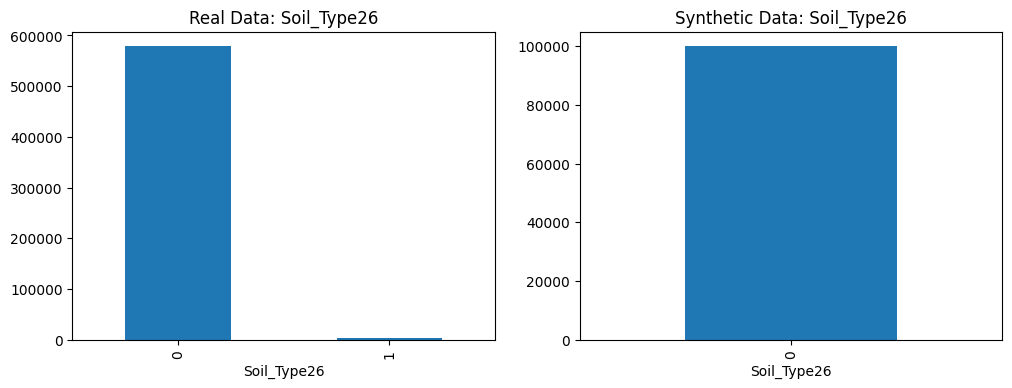

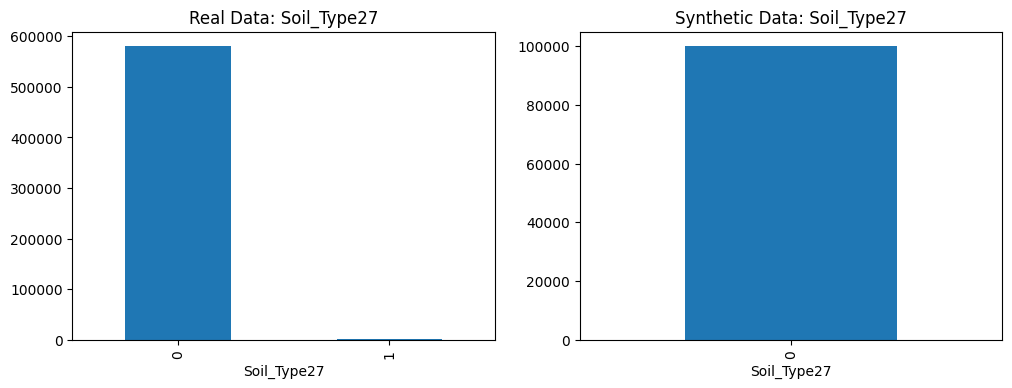

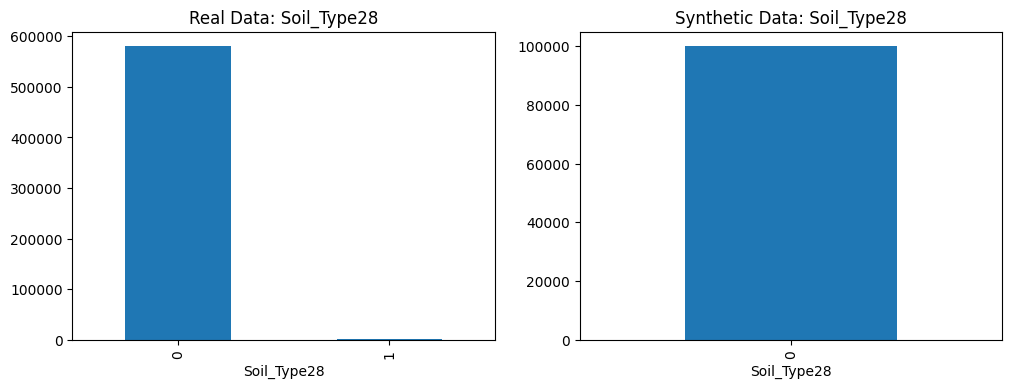

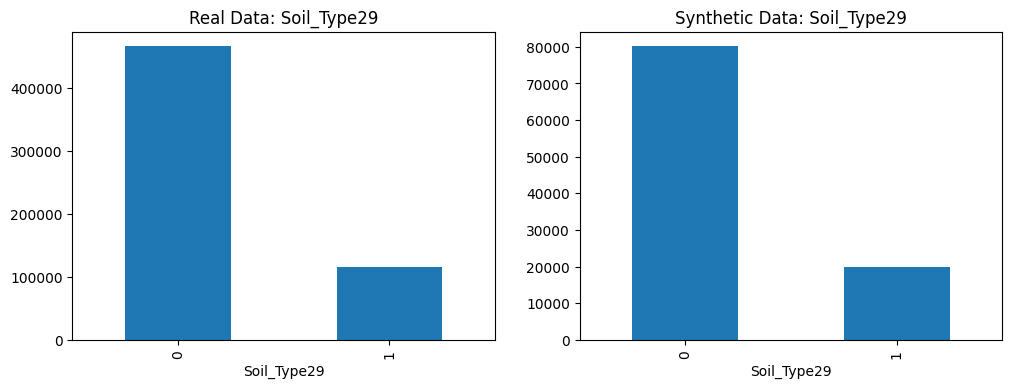

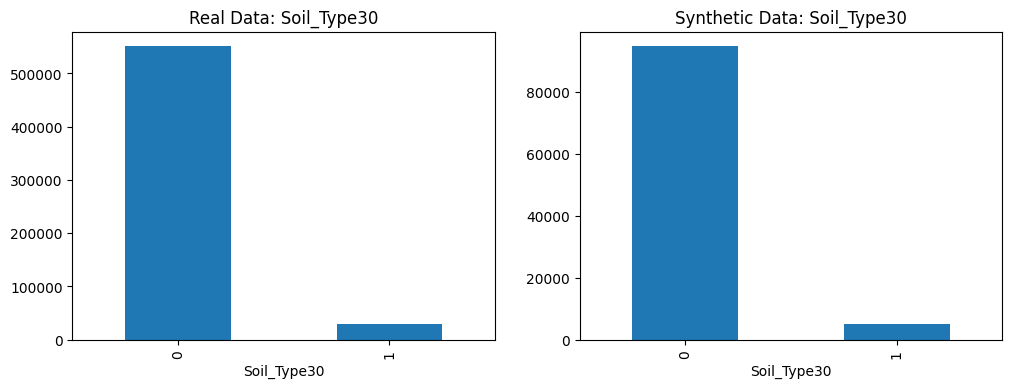

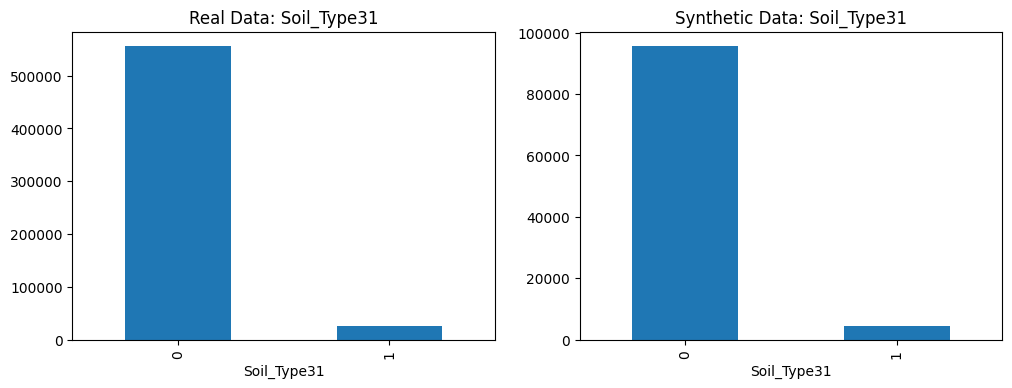

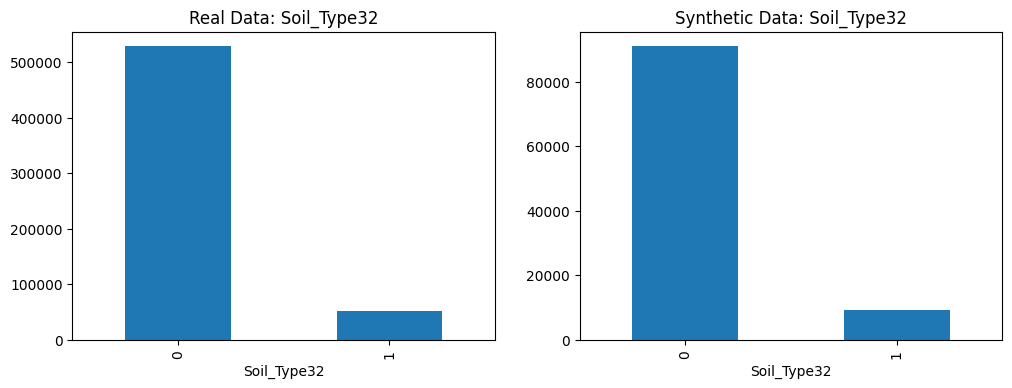

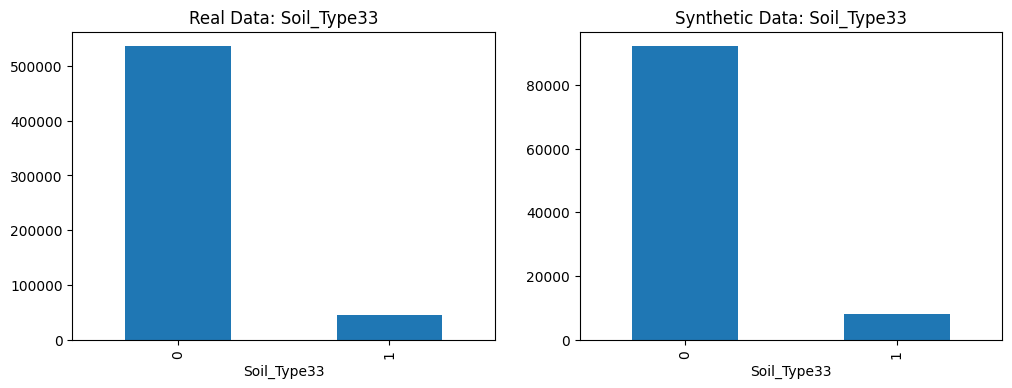

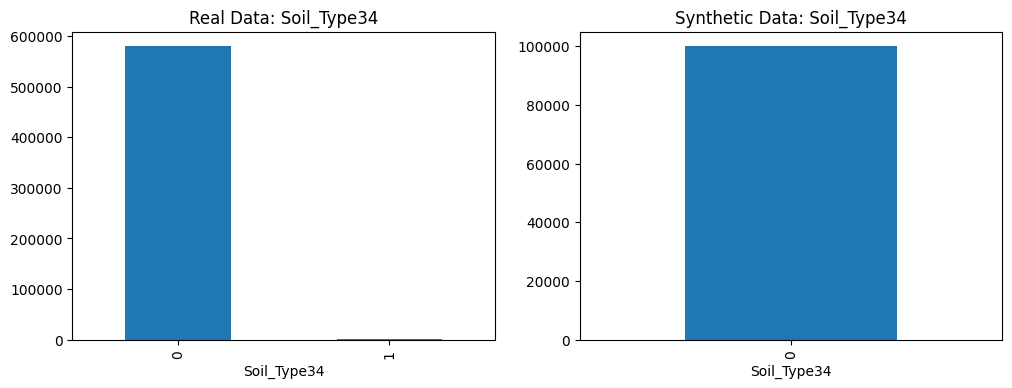

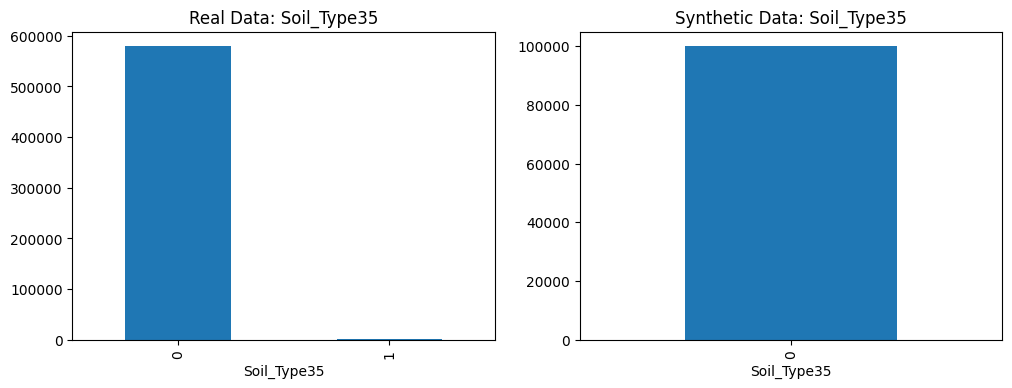

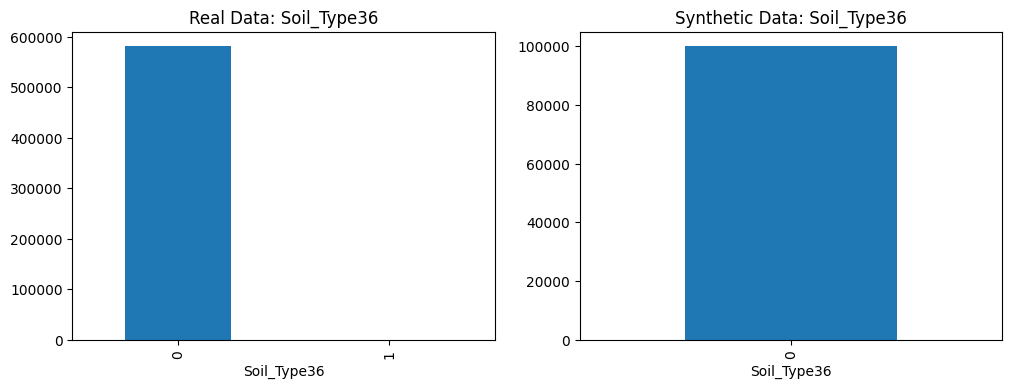

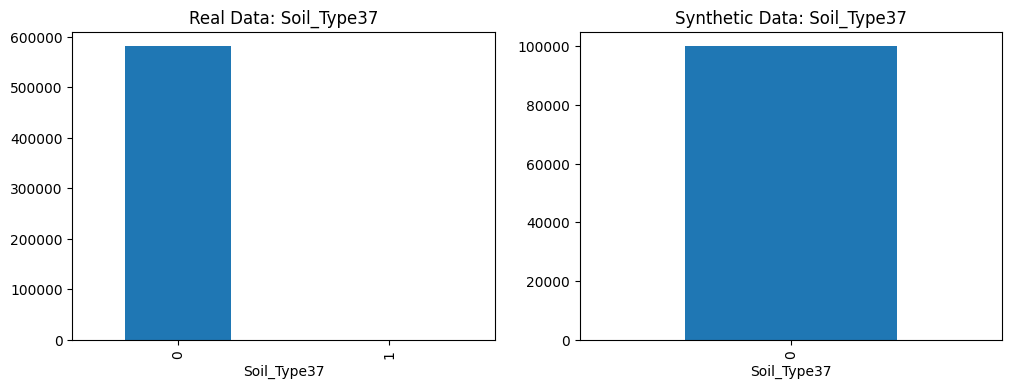

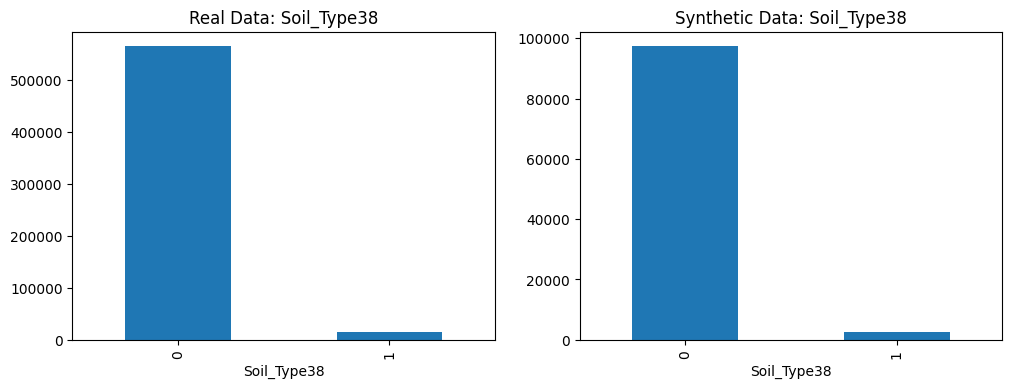

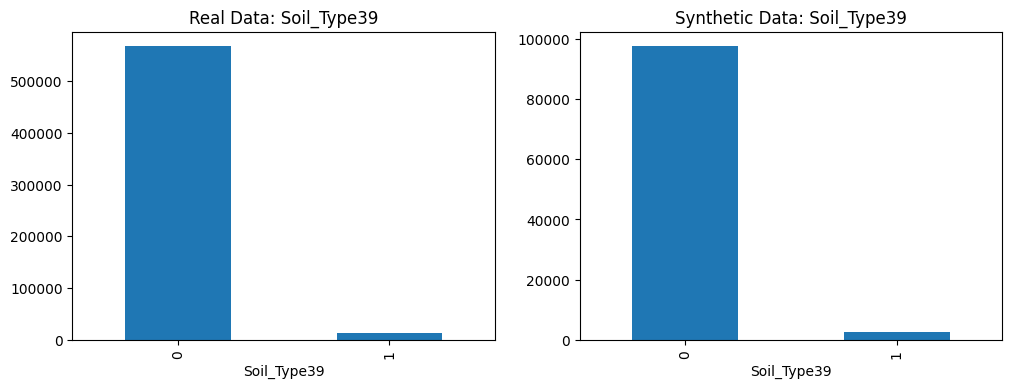

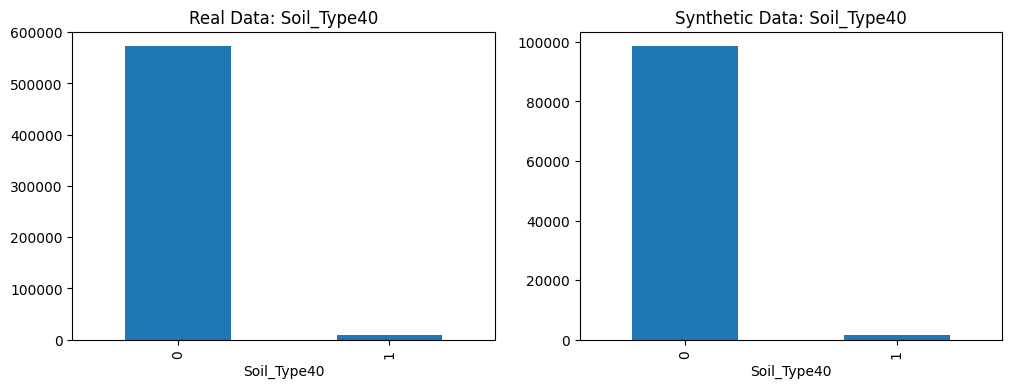

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_soil_type_counts(real_data, synthetic_data):
  """
  Plots the count of 0s and 1s for soil type columns in both real and synthetic data.

  Args:
    real_data: Pandas DataFrame containing real data.
    synthetic_data: Pandas DataFrame containing synthetic data.
  """

  soil_type_cols = [col for col in real_data.columns if col.startswith('Soil_Type')]
    
  for col in soil_type_cols:
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    # Real data
    real_counts = real_data[col].value_counts()
    real_counts.plot(kind='bar', ax=axs[0], title=f'Real Data: {col}')

    # Synthetic data
    synthetic_counts = synthetic_data[col].value_counts()
    synthetic_counts.plot(kind='bar', ax=axs[1], title=f'Synthetic Data: {col}')

    plt.show()

# Example usage:
# Assuming you have your real and synthetic data in pandas DataFrames named real_df and synthetic_df
plot_soil_type_counts(df, synthetic_data)


In [4]:
synthetic_data

NameError: name 'synthetic_data' is not defined

In [3]:
import matplotlib.pyplot as plt

def create_scatter_plots(real_data, synthetic_data):
  """
  Creates scatter plots for non-soil-type columns, comparing real and synthetic data.

  Args:
    real_data: Pandas DataFrame containing real data.
    synthetic_data: Pandas DataFrame containing synthetic data.
  """

  soil_type_cols = [col for col in real_data.columns if col.startswith('soil_Type')]
  non_soil_type_cols = set(real_data.columns) - set(soil_type_cols)

  for col in non_soil_type_cols:
    plt.figure(figsize=(6, 4))
    plt.scatter(real_data[col], synthetic_data[col], alpha=0.5)
    plt.xlabel(f'Real {col}')
    plt.ylabel(f'Synthetic {col}')
    plt.title(f'Scatter Plot: {col}')
    plt.grid(True)
    plt.show()
